In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 确定标的
# 债券
bond = ['151002', '110008', '233005']
# 另类及其他
alt = ['320017', '000179', '518880']
# 股票
stock = ['540006', '160211', '020003', '320011', '163110']
# 现金年化收益率
cash = 0.035

all = []
all.extend(bond)
all.extend(stock)
all.extend(alt)
# 读取数据
data = pd.read_csv("data/data_all.csv").dropna()
data.index = data.sk_date.apply(lambda d: pd.Timestamp(str(d)))
del data['sk_date']
benchmark = data["000300"]

# 计算收益和对数收益
returns = data / data.shift(1)
log_ret = np.log(returns)

# 回测数据
start_date = "2015-01-01"
end_date = "2017-05-11"
daily_returns = returns[all][start_date:end_date]
benchmark_returns = benchmark[start_date:end_date] / \
                    benchmark[start_date:end_date].iloc[0]

## 计算大类资产收益率
# 大类资产内部个标的权重为
log_ret_var = np.sqrt(log_ret.var(axis=0))
bond_var = log_ret_var[bond]
bond_rets = daily_returns[bond].dot((1/bond_var)/np.sum(1/bond_var))
alt_var = log_ret_var[alt]
alt_rets = daily_returns[alt].dot((1/alt_var)/np.sum(1/alt_var))
stock_var = log_ret_var[stock]
stock_rets = daily_returns[stock].dot((1/stock_var)/np.sum(1/stock_var))
cash_rets = np.repeat((1.0 + cash)**(1.0/252), len(daily_returns.index))
fund_rets = pd.DataFrame(np.c_[bond_rets, stock_rets, alt_rets, cash_rets],
                         index=daily_returns.index)

In [4]:
weights_ditc = {'1':np.array([0.6266, 0.053, 0.1502, 0.1702]),
               '2':np.array([0.5648, 0.1188, 0.15, 0.1664]),
               '3':np.array([0.4982, 0.1932, 0.1512, 0.1574]),
               '4':np.array([0.4562, 0.2615, 0.1541, 0.1282]),
               '5':np.array([0.4466, 0.2815, 0.1638, 0.1081]),
               '6':np.array([0.395, 0.3423, 0.1646, 0.0981]),
               '7':np.array([0.3518, 0.4062, 0.1647, 0.0773]),
               '8':np.array([0.3027, 0.5265, 0.1117, 0.0591]),
               '9':np.array([0.2463, 0.5864, 0.1156, 0.0517]),
               '10':np.array([0.2267, 0.6618, 0.1115, 0])}

def draw_plot(level, weights_ditc=weights_ditc, returns=fund_rets):
    plt.figure(figsize=(12, 4))
    if str(level == 'all'):
        for l in range(1,11):
            weights = weights_ditc[str(l)]
            net_val = np.sum(weights * returns, axis=1)
            log_net_val = np.log(net_val)
            net_val[0] = 1.0
            fof_asset = np.cumprod(net_val)
            plt.plot(fof_asset, label='FOF {}'.format(str(l)))
    else:        
        weights = weights_ditc[level]
        net_val = np.sum(weights * returns, axis=1)
        log_net_val = np.log(net_val)
        net_val[0] = 1.0
        fof_asset = np.cumprod(net_val)
        plt.plot(fof_asset, 'r', label='FOF')
        print "年化收益率： {:.2f}%".format(log_net_val.mean() * 252 * 100)
        print "年化波动率： {:.2f}%".format(np.sqrt(log_net_val.var() * 252) * 100)
    plt.plot(benchmark_returns, label='HS300')
    plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
    plt.show()

Input Risk Level: all


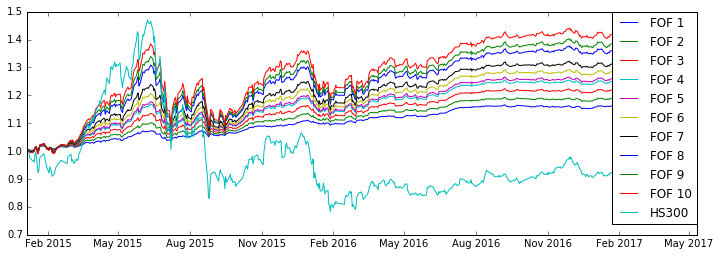

In [7]:
# 画出所有图形
draw_plot(raw_input("Input Risk Level: "))

Input Risk Level: 1


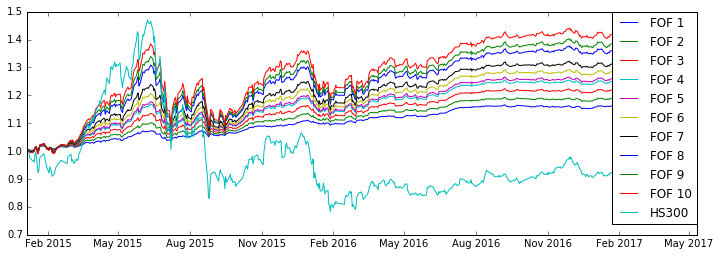

In [8]:
draw_plot(raw_input("Input Risk Level: "))

Input Risk Level: 3
年化收益率： 9.45%
年化波动率： 5.88%


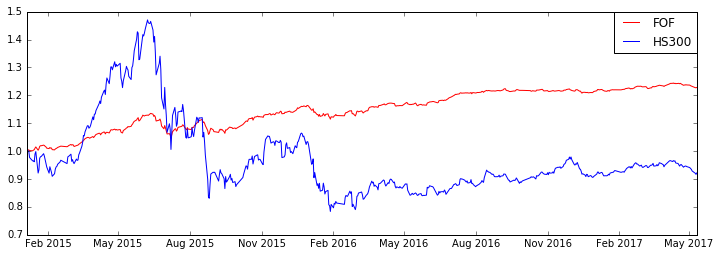

In [5]:
draw_plot(raw_input("Input Risk Level: "))

Input Risk Level: 10
年化收益率： 16.81%
年化波动率： 16.62%


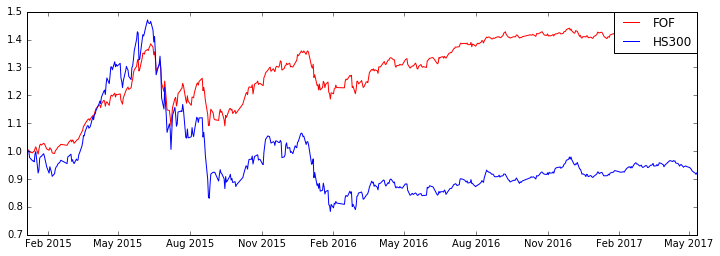

In [7]:
draw_plot(raw_input("Input Risk Level: "))